In [42]:
## Author: Winielson Miranda
## Date: 20200313
## CS301-006, Professor Watson
## Titanic Project Columns Statistics
## CS301-Intro to Data Science GitHub 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Import data set csv
df = pd.read_csv('TitanicData.csv')

In [34]:
# Pclass: determine how many are in each pclass

nFirst = len(df.loc[df['pclass'] == 1])
nSecond = len(df.loc[df['pclass'] == 2])
nThird = len(df.loc[df['pclass'] == 3])

print("Number of passengers in each class:\nFirst: ", nFirst, "\nSecond:", nSecond, "\nThird: ", nThird)

Number of passengers in each class:
First:  323 
Second: 277 
Third:  709


In [39]:
# Survived: determine how many survived

nNo = len(df.loc[df['survived'] == 0])
nYes = len(df.loc[df['survived'] == 1])

print("Number of passengers that Survived:\nDid Not Survive:", nNo, "\nSurvived:", nYes)

Number of passengers that Survived:
Did Not Survive: 809 
Survived: 500


In [62]:
# Name: determine amount of unique names

print("Amount of Unique Names:", len(pd.unique(df['name'])))

# Display rows with duplicated names
df[df['name'].duplicated(keep=False)]

Amount of Unique Names: 1307


pid  pclass  survived                  name     sex   age  \
261  262       3         0  Connolly, Miss. Kate  female  30.0   
262  263       3         1  Connolly, Miss. Kate  female  22.0   
646  647       3         0      Kelly, Mr. James    male  35.0   
647  648       3         0      Kelly, Mr. James    male  44.0   

     siblings/spouses  parents/children  ticket  fare cabin embarked boat  \
261                 0                 0  330972  7.63   NaN        Q  NaN   
262                 0                 0  370373  7.75   NaN        Q   13   
646                 0                 0  330911  7.83   NaN        Q  NaN   
647                 0                 0  363592  8.05   NaN        S  NaN   

     body home.dest outliers  
261   NaN   Ireland    False  
262   NaN   Ireland    False  
646  70.0       NaN    False  
647   NaN       NaN    False

In [45]:
# Sex: determine amount of each gender

nMale = len(df.loc[df['sex'] == 'male'])
nFemale = len(df.loc[df['sex'] == 'female'])

print("Number of passengers by gender:\nMale:  ", nMale, "\nFemale:", nFemale)

Number of passengers by gender:
Male:   843 
Female: 466


In [71]:
# Age: Find Age Outliers

# Mean age
print("Mean age:", df['age'].mean())

# Get Quantiles
Q1 = df['age'].quantile(0.25)
Q2 = df['age'].quantile(0.5)
Q3 = df['age'].quantile(0.75)
print(Q1,Q2,Q3)

# Determine IQR
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Create an dataframe with age outliers
outliersdf = df.loc[(df['age'] > upper_bound) | (df['age'] < lower_bound)]
print("Number of outliers in age column: ", len(outliersdf))
print("Outliers (pid, age):")
print(outliersdf['age'].sort_values(ascending=True)) # print the age outliers

Mean age: 29.62375478927203
21.0 28.0 38.0
Number of outliers in age column:  22
Outliers (pid, age):
1245    64.0
1152    64.0
258     64.0
1017    64.0
284     64.0
413     64.0
869     64.0
806     65.0
916     65.0
359     65.0
1264    66.0
1251    66.0
1159    67.0
1016    69.0
814     70.0
282     70.0
457     71.0
263     71.0
54      71.0
1168    74.0
217     76.0
93      80.0
Name: age, dtype: float64


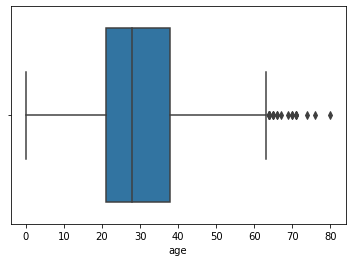

In [20]:
# Passenger Age Box Plot Visualization

boxplot = sns.boxplot(x=df['age'])
boxplot